# Figures and Tables in main body of paper

## Figure 1

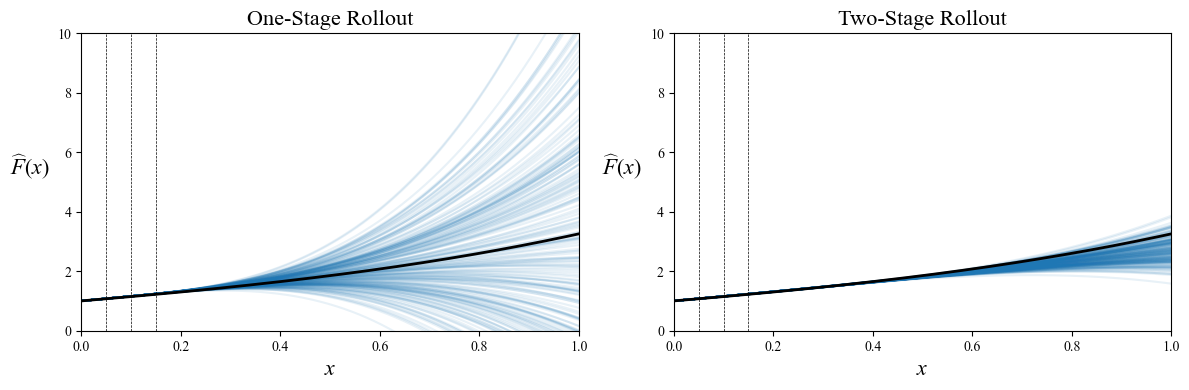

In [1]:
# Creates Figure 1: Visualization of extrapolated polynomials
import matplotlib.pyplot as plt
from experiment_python_scripts.experiment_functions import *

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"

n = 400   
beta = 3    
r = 200

lat_n = int(np.sqrt(n))
A = lattice2Dsq(lat_n,lat_n)

h = homophily_effects(A)
fY = pom_ugander_yin(A,h,beta)

p = 0.15
P = [0, p/3, 2*p/3, p] 

nu = 160
K = np.linspace(0,int(n*p),beta+1,dtype=int)
Q = K/nu

l0 = lambda P: lambda x: (x-P[1])*(x-P[2])*(x-P[3])/((P[0]-P[1])*(P[0]-P[2])*(P[0]-P[3]))
l1 = lambda P: lambda x: (x-P[0])*(x-P[2])*(x-P[3])/((P[1]-P[0])*(P[1]-P[2])*(P[1]-P[3]))
l2 = lambda P: lambda x: (x-P[0])*(x-P[1])*(x-P[3])/((P[2]-P[0])*(P[2]-P[1])*(P[2]-P[3]))
l3 = lambda P: lambda x: (x-P[0])*(x-P[1])*(x-P[2])/((P[3]-P[0])*(P[3]-P[1])*(P[3]-P[2]))

f = lambda Y: lambda P: lambda x : Y[0]*l0(P)(x) + Y[1]*l1(P)(x) + Y[2]*l2(P)(x) + Y[3]*l3(P)(x)

fig,ax = plt.subplots(1,2,sharey=True,sharex=True, figsize=(10,5))

fig.set_figheight(4)
fig.set_figwidth(12)
ax[0].set_title("One-Stage Rollout",fontsize=16)
ax[1].set_title("Two-Stage Rollout",fontsize=16)
ax[1].yaxis.set_tick_params(which='both', labelleft=True)

plt.setp(ax,xlim=(0,1))
plt.setp(ax,ylim=(0,10))
plt.setp(ax,xlabel="$x$")

x = np.linspace(0,1,10000)

Z,_ = complete_staggered_rollout_two_stage_unit(n, K, r=r)
Y = 1/n*np.sum(fY(Z),axis=2)

for i in range(r):
    f_hat = f(Y[:,i])(P)
    ax[0].plot(x,f_hat(x),color="tab:blue",alpha=0.1)


for i in range(r):
    f_hat = f(Y[:,i])(Q)
    ax[1].plot(x,Q[-1]/p*(f_hat(x)-f_hat(0))+f_hat(0),color="tab:blue",alpha=0.1)

true_y = [1/n*np.sum(fY(np.ones(n)*P[0])),1/n*np.sum(fY(np.ones(n)*P[1])),1/n*np.sum(fY(np.ones(n)*P[2])), 1/n*np.sum(fY(np.ones(n)*P[3]))]

for axis in ax:
    axis.set_ylabel("$\\widehat{F}(x)$", labelpad=20, rotation='horizontal', fontsize=16)
    axis.xaxis.label.set(fontsize=16)
    axis.plot(x,f(true_y)(P)(x),"k",linewidth=2)

    axis.axvline(x=0.05,color="k",linewidth=0.5,linestyle='--')
    axis.axvline(x=0.1,color="k",linewidth=0.5,linestyle='--')
    axis.axvline(x=0.15,color="k",linewidth=0.5,linestyle='--')

fig.tight_layout()
plt.show()

## Figure 2

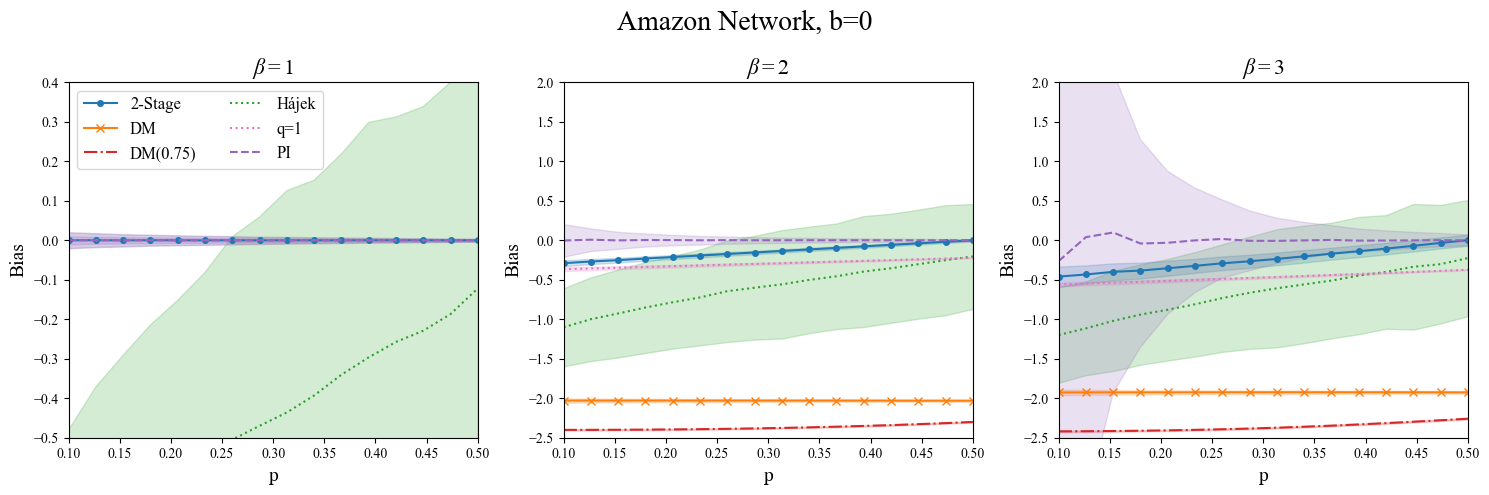

In [2]:
import experiment_python_scripts.compare_estimators_plot as est_plot
import pickle

mse = False # plot MSE ?  if false, plots bias and variance plots instead
network_name = "Amazon"    
data_file = open(network_name + "/Experiments/compare_estimators.pkl", 'rb')
data = pickle.load(data_file)
data_file.close()

save_name = "compare_estimators_" + network_name
if mse:
    save_name = save_name + "_MSE.png"
else:
    save_name = save_name + ".png"

est_plot.draw_plots(data,save_name,mse,network_name,dimensions=[[-0.5,0.4], [-2.5,2.0], [-2.5, 2.0]])

## Figure 3 and Table 1

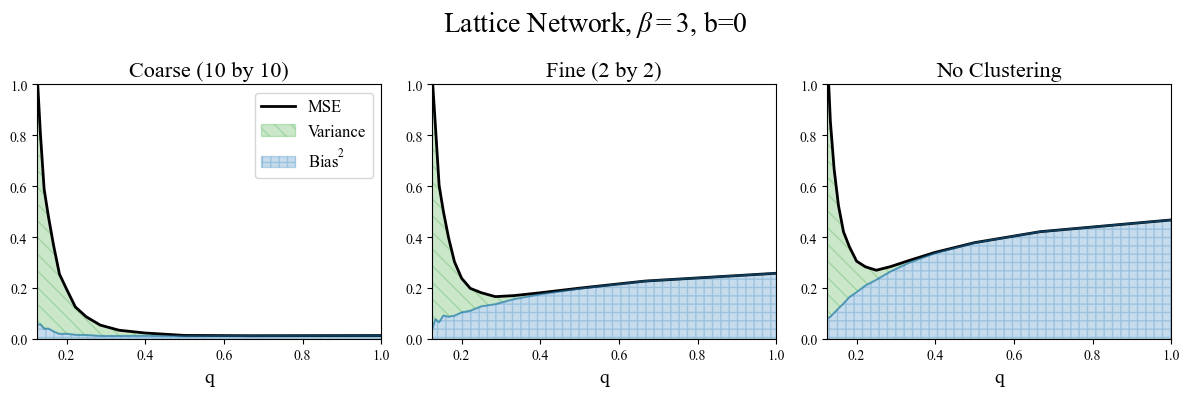

In [3]:
import experiment_python_scripts.lattice_compare_clusterings_plot as lattice_plot
import pickle

data_file = open("Lattice/compare_clusterings.pkl", 'rb')
save_name = "compare_clusterings_Lattice.png"
data = pickle.load(data_file)
data_file.close()

b = 0
beta = 3

lattice_plot.draw_plots(data, save_name, b, beta)

In [1]:
import experiment_python_scripts.lattice_clustering_metrics as lattice_table

betas = [3]
network = "Lattice"
experiment = 'compare_clusterings' # if using the files with some homophily (b=0.5) use 'compare_clusterings_b05'
lattice_table.create_table(betas, network, experiment, save_file=False)

/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


nc=50,n=100,k=2
nc=10,n=100,k=10

Lattice Network, beta = 3, 'fine' clustering
Var: 0.002047828237968309, cut effect: 0.570330348757409, cuts: 19600
q_min = 0.2857142857142857, MSE(q_min) = 0.1654670802662875

Lattice Network, beta=3, 'coarse' clustering
Var: 0.00021647420907915587, cut effect: 0.12288957015682822, cuts: 3600
q_min = 0.6666666666666666, MSE(q_min) = 0.011847008226324892



## Figure 4 and Table 2

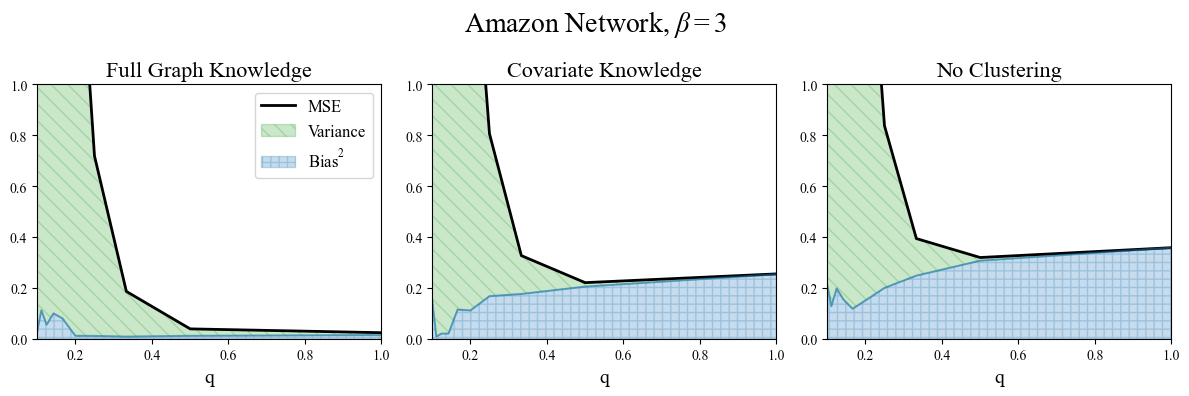

In [5]:
import experiment_python_scripts.compare_clusterings_plot as cluster_plot
import pickle

network_name = "Amazon"

data_file = open(network_name + "/Experiments/compare_clusterings.pkl", 'rb')
save_name = "compare_clusterings_" + network_name + ".png"
data = pickle.load(data_file)
data_file.close()

beta = 3

cluster_plot.draw_plots(network_name, save_name, data, beta)

In [1]:
import experiment_python_scripts.clustering_metrics_table as cluster_table

networks = ['Amazon']
ncs = [250]
betas = [3]
experiment = 'compare_clusterings' # if using the files with some homophily (b=0.5) use 'compare_clusterings_b05'

cluster_table.create_tables(networks, ncs, betas, experiment,save_file=False)

Amazon Network, beta = 3, 'graph' clustering with 250 clusters
Var: 0.25058178061197645, cut effect: 0.12571433038323132, cuts: 7670
q_min = 1.0004036326942483, MSE(q_min) = 0.023693062994100178

Amazon Network, beta=3, 'covariate' clustering with 250 clusters
Var: 0.04318300481577587, cut effect: 0.5434826669600958, cuts: 41243
q_min = 0.5002018163471241, MSE(q_min) = 0.2204229059289694



## Table 3

In [3]:
import experiment_python_scripts.clustering_metrics_table as cluster_table

networks = ['Amazon', 'Amazon', 'Amazon']
ncs = [50, 100, 250]
betas = [3]
experiment = 'compare_clusterings' # if using the files with some homophily (b=0.5) use 'compare_clusterings_b05'

cluster_table.create_tables(networks, ncs, betas, experiment,save_file=False)

Amazon Network, beta = 3, 'graph' clustering with 50 clusters
Var: 0.1579937634154383, cut effect: 0.08855517159247794, cuts: 4469
q_min = 1.0004036326942483, MSE(q_min) = 0.034820312860409625

Amazon Network, beta=3, 'covariate' clustering with 50 clusters
Var: 0.019608727365566563, cut effect: 0.5185621766648587, cuts: 38864
q_min = 0.5002018163471241, MSE(q_min) = 0.2105912730919366

Amazon Network, beta = 3, 'graph' clustering with 100 clusters
Var: 0.18870960509288237, cut effect: 0.10254252379470508, cuts: 5331
q_min = 1.0004036326942483, MSE(q_min) = 0.02797062409068069

Amazon Network, beta=3, 'covariate' clustering with 100 clusters
Var: 0.02465341637435062, cut effect: 0.5374453164422703, cuts: 40857
q_min = 0.5002018163471241, MSE(q_min) = 0.22785584021961516

Amazon Network, beta = 3, 'graph' clustering with 250 clusters
Var: 0.25145869301084434, cut effect: 0.12644653403954997, cuts: 7670
q_min = 1.0004036326942483, MSE(q_min) = 0.023693062994100178

Amazon Network, beta=3

# Appendix Figures and Tables

## Figure 8

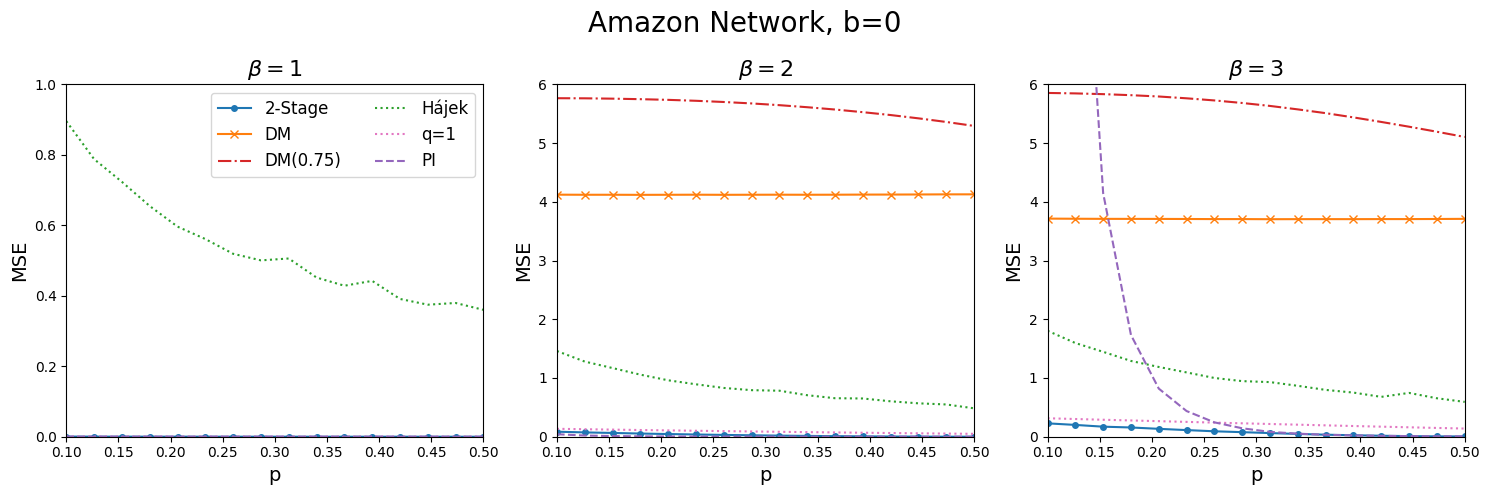

In [4]:
import experiment_python_scripts.compare_estimators_plot as est_plot
import pickle

mse = True # plot MSE ?  if false, plots bias and variance plots instead
network_name = "Amazon"    
data_file = open(network_name + "/Experiments/compare_estimators.pkl", 'rb')
data = pickle.load(data_file)
data_file.close()

save_name = "compare_estimators_" + network_name
if mse:
    save_name = save_name + "_MSE.png"
else:
    save_name = save_name + ".png"

est_plot.draw_plots(data,save_name,mse,network_name,dimensions=[[0,1], [0,6], [0, 6]])

## Figure 9

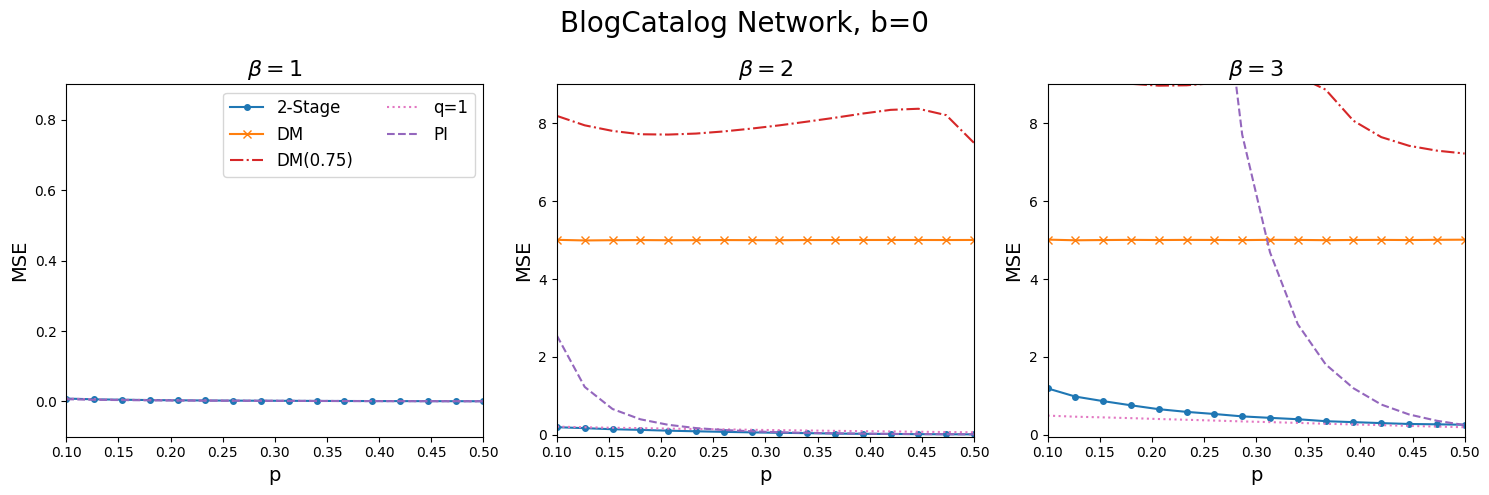

In [5]:
import experiment_python_scripts.compare_estimators_plot as est_plot
import pickle

mse = True # plot MSE ?  if false, plots bias and variance plots instead
network_name = "BlogCatalog"    
data_file = open(network_name + "/Experiments/compare_estimators.pkl", 'rb')
data = pickle.load(data_file)
data_file.close()

save_name = "compare_estimators_" + network_name
if mse:
    save_name = save_name + "_MSE.png"
else:
    save_name = save_name + ".png"

est_plot.draw_plots(data,save_name,mse,network_name,dimensions=[[-0.1,0.9], [-0.05,9], [-0.05, 9]])

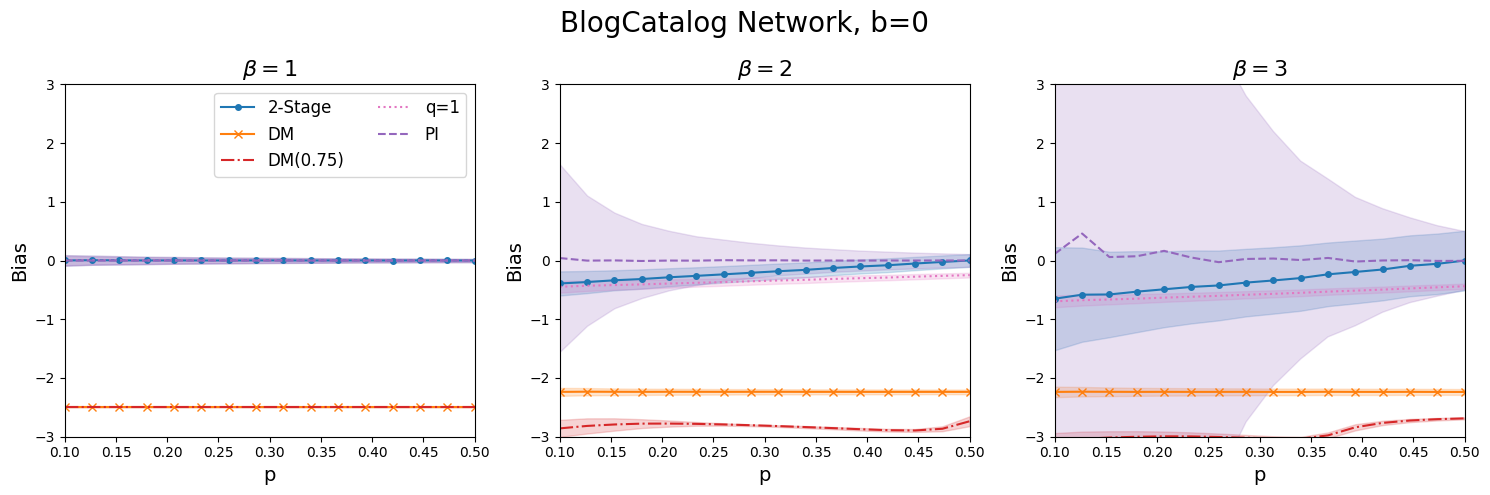

In [6]:
import experiment_python_scripts.compare_estimators_plot as est_plot
import pickle

mse = False # plot MSE ?  if false, plots bias and variance plots instead
network_name = "BlogCatalog"    
data_file = open(network_name + "/Experiments/compare_estimators.pkl", 'rb')
data = pickle.load(data_file)
data_file.close()

save_name = "compare_estimators_" + network_name
if mse:
    save_name = save_name + "_MSE.png"
else:
    save_name = save_name + ".png"

est_plot.draw_plots(data,save_name,mse,network_name,dimensions=[[-3,3], [-3,3], [-3, 3]])

## Figure 10

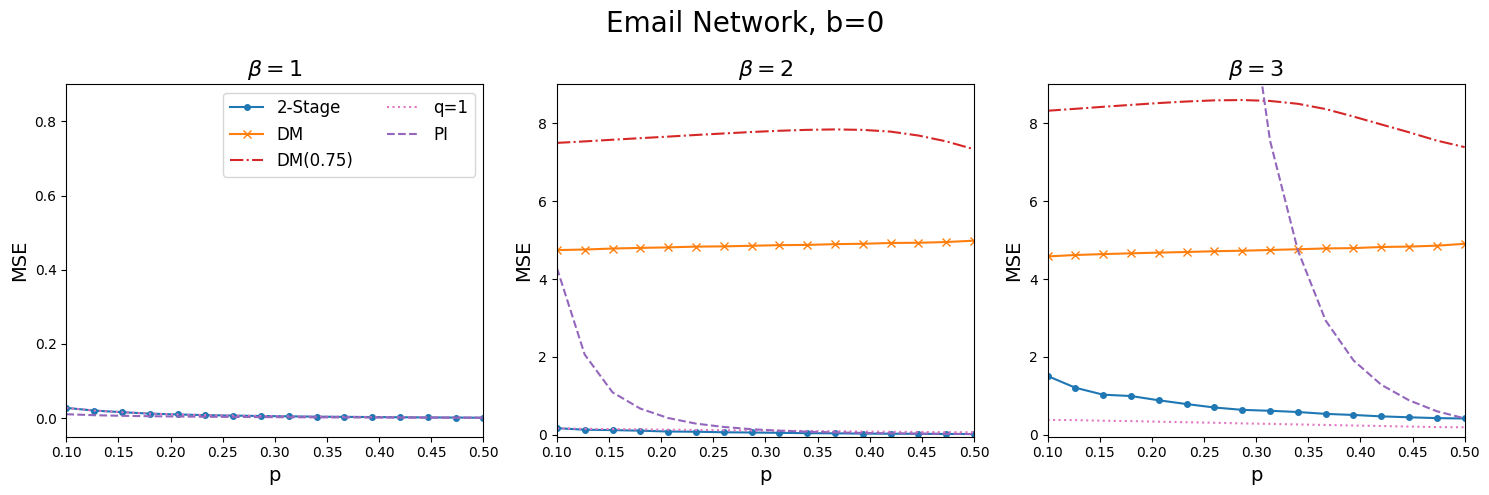

In [7]:
import experiment_python_scripts.compare_estimators_plot as est_plot
import pickle

mse = True # plot MSE ?  if false, plots bias and variance plots instead
network_name = "Email"    
data_file = open(network_name + "/Experiments/compare_estimators.pkl", 'rb')
data = pickle.load(data_file)
data_file.close()

save_name = "compare_estimators_" + network_name
if mse:
    save_name = save_name + "_MSE.png"
else:
    save_name = save_name + ".png"

est_plot.draw_plots(data,save_name,mse,network_name,dimensions=[[-0.05,0.9], [-0.05,9], [-0.05, 9]])

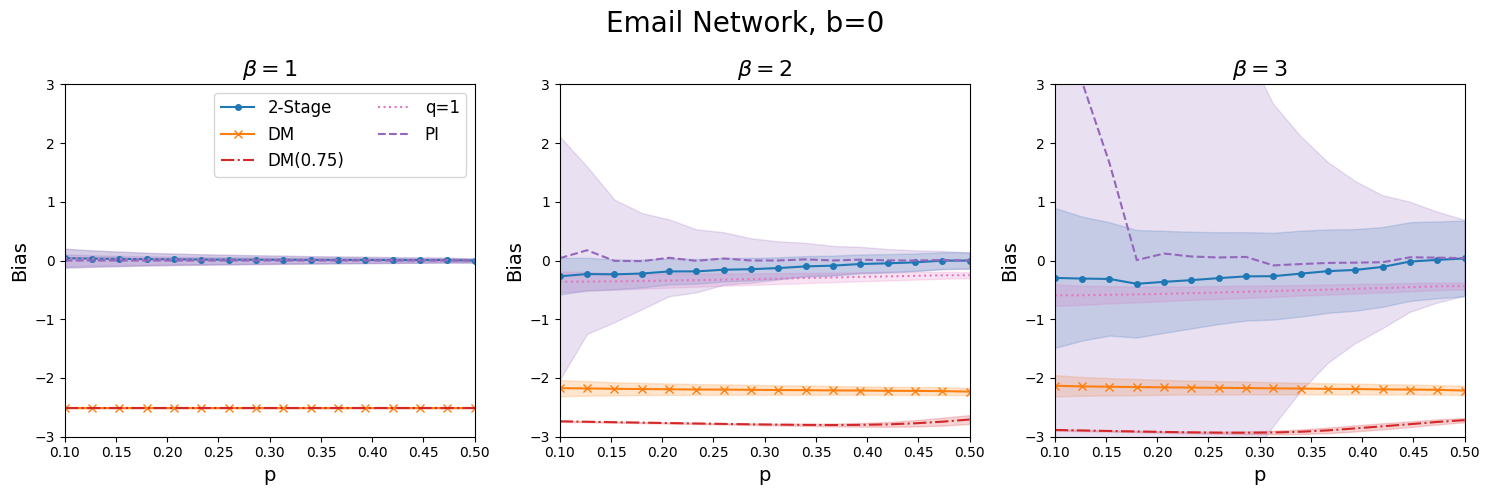

In [8]:
import experiment_python_scripts.compare_estimators_plot as est_plot
import pickle

mse = False # plot MSE ?  if false, plots bias and variance plots instead
network_name = "Email"    
data_file = open(network_name + "/Experiments/compare_estimators.pkl", 'rb')
data = pickle.load(data_file)
data_file.close()

save_name = "compare_estimators_" + network_name
if mse:
    save_name = save_name + "_MSE.png"
else:
    save_name = save_name + ".png"

est_plot.draw_plots(data,save_name,mse,network_name,dimensions=[[-3,3], [-3,3], [-3, 3]])

## Tables 4 and 5

In [9]:
import experiment_python_scripts.clustering_metrics_table as cluster_table

networks = ['BlogCatalog']
ncs = [50]
betas = [2,3]
experiment = 'compare_clusterings' # if using the files with some homophily (b=0.5) use 'compare_clusterings_b05'

cluster_table.create_tables(networks, ncs, betas, experiment,save_file=False)

BlogCatalog Network, beta = 2, 'graph' clustering with 50 clusters
Var: 0.7028680463842205, cut effect: 0.47104382411361945, cuts: 604504
q_min = 0.5000969932104753, MSE(q_min) = 0.2604052967268783

BlogCatalog Network, beta=2, 'covariate' clustering with 50 clusters
Var: 0.060251191745373515, cut effect: 0.48666709783323747, cuts: 643080
q_min = 0.5000969932104753, MSE(q_min) = 0.19027035715178475

BlogCatalog Network, beta = 3, 'graph' clustering with 50 clusters
Var: 0.7067569116540544, cut effect: 0.7194930955718768, cuts: 604504
q_min = 1.0001939864209506, MSE(q_min) = 0.6098521535489954

BlogCatalog Network, beta=3, 'covariate' clustering with 50 clusters
Var: 0.060089724605571646, cut effect: 0.7368737163154422, cuts: 643080
q_min = 1.0001939864209506, MSE(q_min) = 0.486401074173021



In [10]:
import experiment_python_scripts.clustering_metrics_table as cluster_table

networks = ['Email']
ncs = [42]
betas = [2,3]
experiment = 'compare_clusterings' # if using the files with some homophily (b=0.5) use 'compare_clusterings_b05'

cluster_table.create_tables(networks, ncs, betas, experiment,save_file=False)

Email Network, beta = 2, 'graph' clustering with 42 clusters
Var: 0.3964224087364789, cut effect: 0.4392164696637295, cuts: 21756
q_min = 0.5025, MSE(q_min) = 0.23225627112205546

Email Network, beta=2, 'covariate' clustering with 42 clusters
Var: 0.3964583046569601, cut effect: 0.3700387787759054, cuts: 16284
q_min = 1.005, MSE(q_min) = 0.13262607093359283

Email Network, beta = 3, 'graph' clustering with 42 clusters
Var: 0.4182235938162466, cut effect: 0.6907376871348303, cuts: 21756
q_min = 1.005, MSE(q_min) = 0.4831147346417115

Email Network, beta=3, 'covariate' clustering with 42 clusters
Var: 0.4098397200125133, cut effect: 0.5940641439971723, cuts: 16284
q_min = 1.005, MSE(q_min) = 0.2884958247041026



## Figure 12

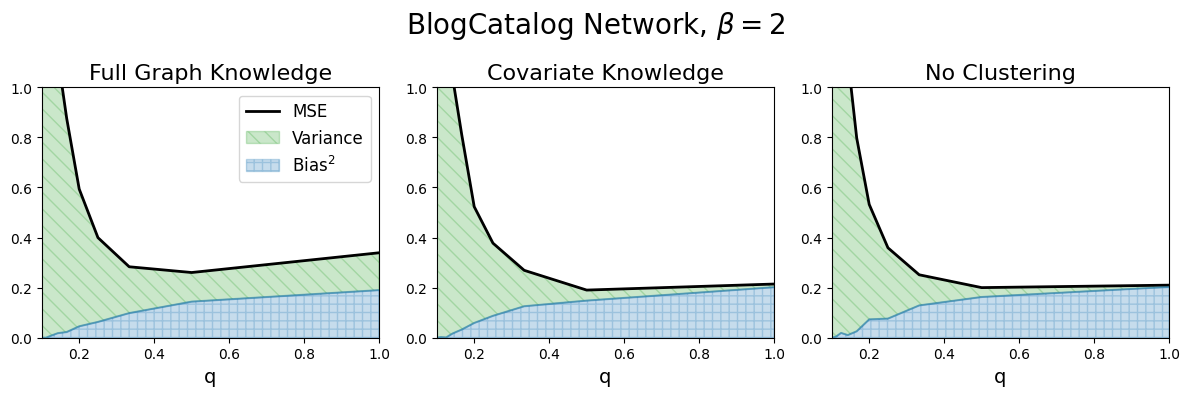

In [11]:
import experiment_python_scripts.compare_clusterings_plot as cluster_plot
import pickle

network_name = "BlogCatalog"

data_file = open(network_name + "/Experiments/compare_clusterings.pkl", 'rb')
save_name = "compare_clusterings_" + network_name + ".png"
data = pickle.load(data_file)
data_file.close()

beta = 2

cluster_plot.draw_plots(network_name, save_name, data, beta)

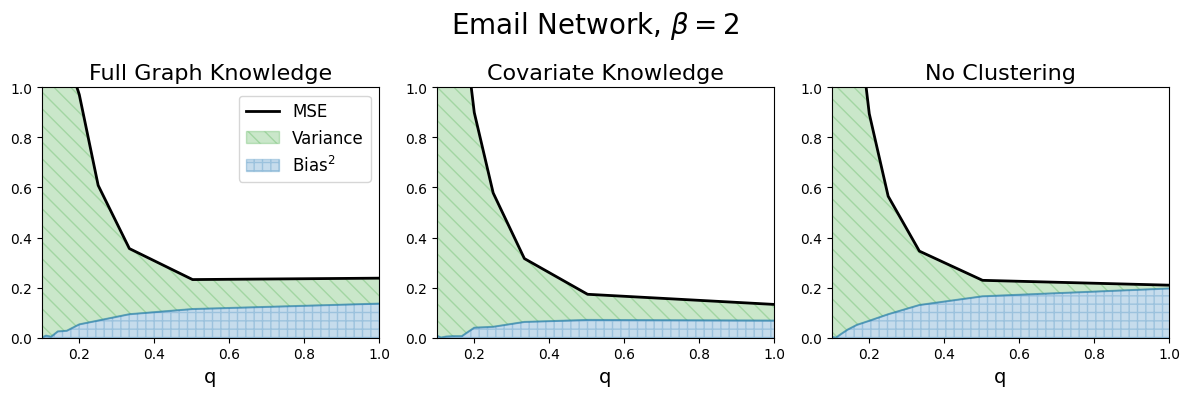

In [12]:
import experiment_python_scripts.compare_clusterings_plot as cluster_plot
import pickle

network_name = "Email"

data_file = open(network_name + "/Experiments/compare_clusterings.pkl", 'rb')
save_name = "compare_clusterings_" + network_name + ".png"
data = pickle.load(data_file)
data_file.close()

beta = 2

cluster_plot.draw_plots(network_name, save_name, data, beta)

## Figure 13

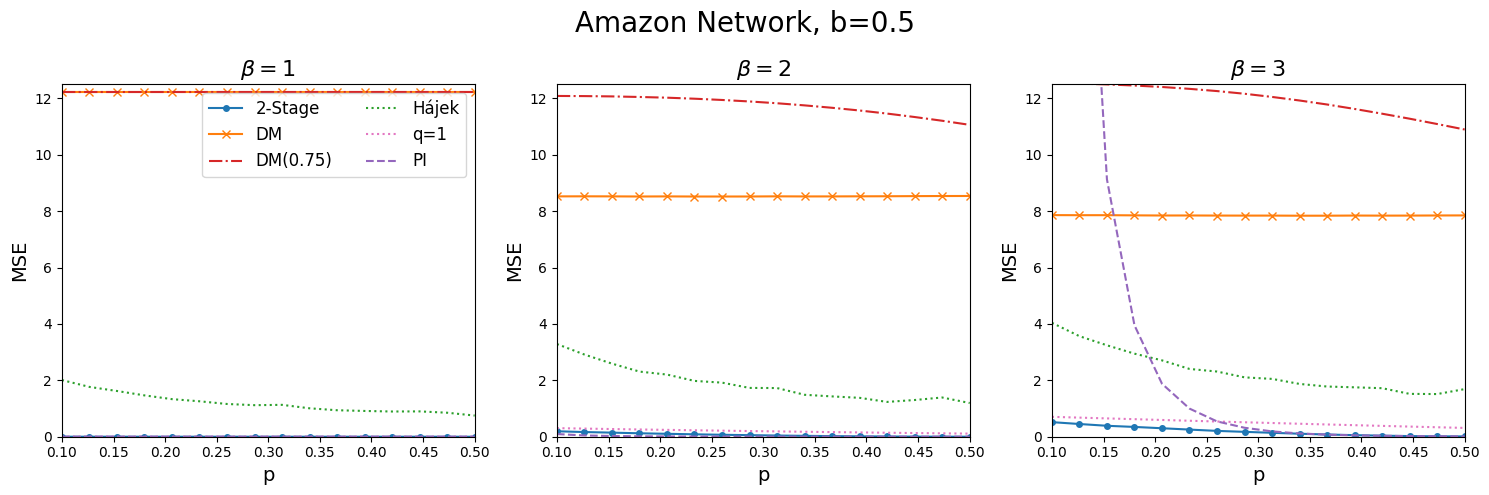

In [13]:
import experiment_python_scripts.compare_estimators_plot as est_plot
import pickle

mse = True # plot MSE ?  if false, plots bias and variance plots instead
network_name = "Amazon"    
data_file = open(network_name + "/Experiments/compare_estimators_b05.pkl", 'rb') # note name change to include _b05 at the end
data = pickle.load(data_file)
data_file.close()

save_name = "compare_estimators_b05_" + network_name
if mse:
    save_name = save_name + "_MSE.png"
else:
    save_name = save_name + ".png"

est_plot.draw_plots(data,save_name,mse,network_name,b=0.5,dimensions=[[0,12.5], [0,12.5], [0, 12.5]])

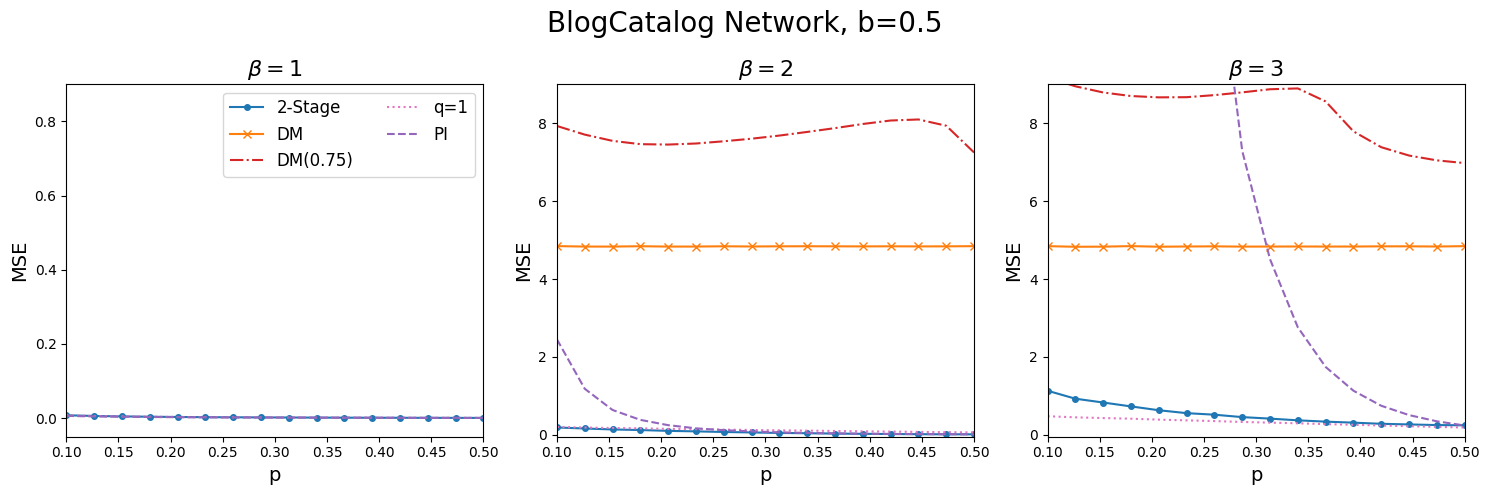

In [14]:
import experiment_python_scripts.compare_estimators_plot as est_plot
import pickle

mse = True # plot MSE ?  if false, plots bias and variance plots instead
network_name = "BlogCatalog"    
data_file = open(network_name + "/Experiments/compare_estimators_b05.pkl", 'rb') # note name change to include _b05 at the end
data = pickle.load(data_file)
data_file.close()

save_name = "compare_estimators_b05_" + network_name
if mse:
    save_name = save_name + "_MSE.png"
else:
    save_name = save_name + ".png"

est_plot.draw_plots(data,save_name,mse,network_name,b=0.5,dimensions=[[-0.05,0.9], [-0.05,9], [-0.05, 9]])

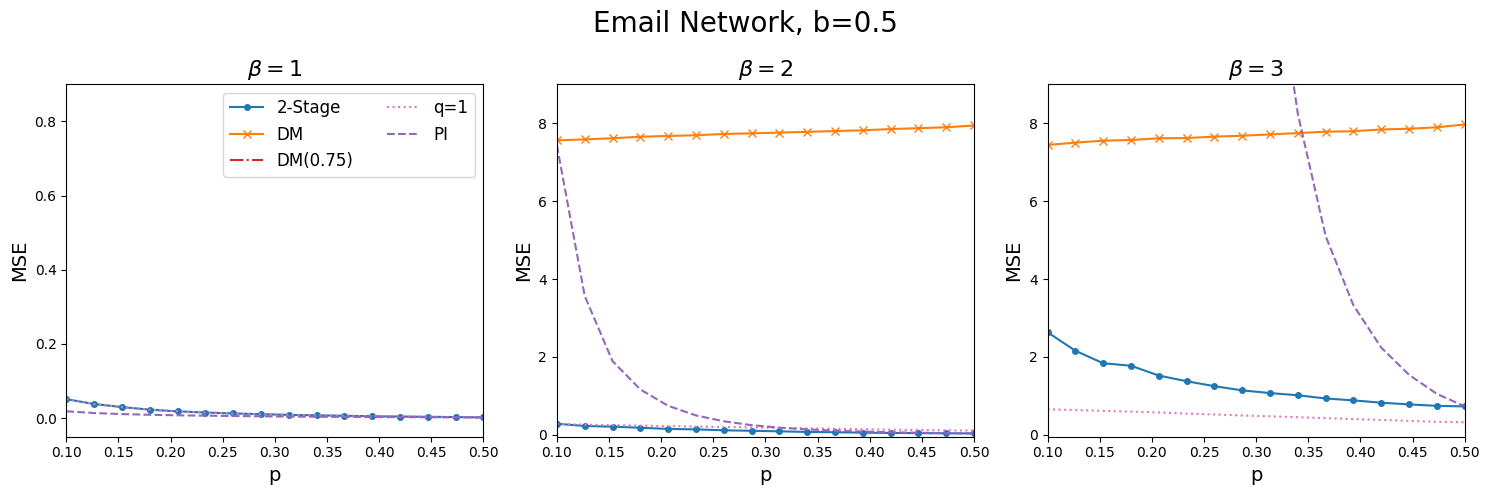

In [15]:
import experiment_python_scripts.compare_estimators_plot as est_plot
import pickle

mse = True # plot MSE ?  if false, plots bias and variance plots instead
network_name = "Email"    
data_file = open(network_name + "/Experiments/compare_estimators_b05.pkl", 'rb') # note name change to include _b05 at the end
data = pickle.load(data_file)
data_file.close()

save_name = "compare_estimators_b05_" + network_name
if mse:
    save_name = save_name + "_MSE.png"
else:
    save_name = save_name + ".png"

est_plot.draw_plots(data,save_name,mse,network_name,b=0.5,dimensions=[[-0.05,0.9], [-0.05,9], [-0.05, 9]])

## Figure 14

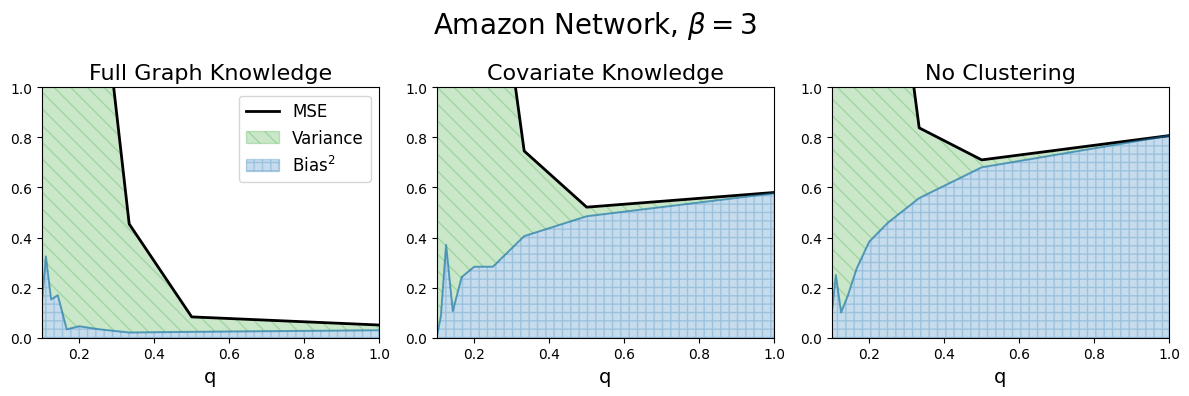

In [16]:
import experiment_python_scripts.compare_clusterings_plot as cluster_plot
import pickle

network_name = "Amazon"

data_file = open(network_name + "/Experiments/compare_clusterings_b05.pkl", 'rb')
save_name = "compare_clusterings_b05_" + network_name + ".png"
data = pickle.load(data_file)
data_file.close()

beta = 3

cluster_plot.draw_plots(network_name, save_name, data, beta)

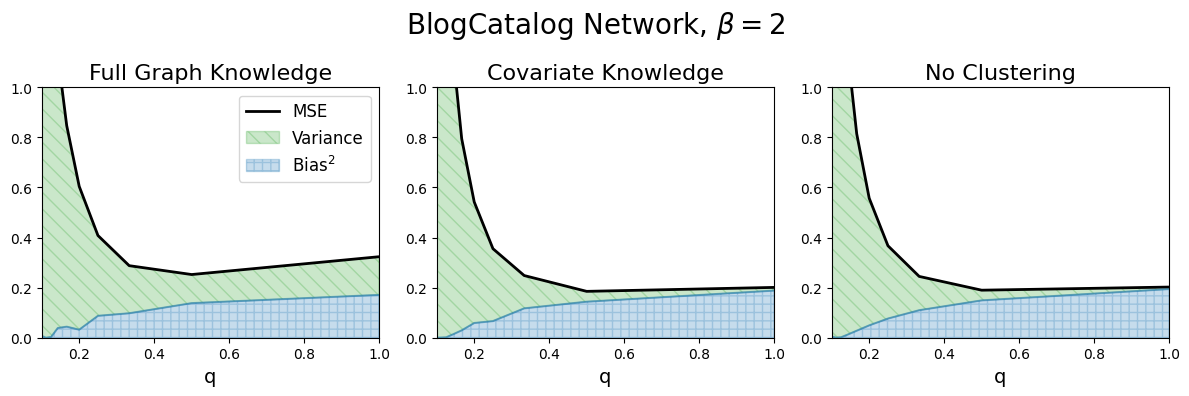

In [17]:
import experiment_python_scripts.compare_clusterings_plot as cluster_plot
import pickle

network_name = "BlogCatalog"

data_file = open(network_name + "/Experiments/compare_clusterings_b05.pkl", 'rb')
save_name = "compare_clusterings_b05_" + network_name + ".png"
data = pickle.load(data_file)
data_file.close()

beta = 2

cluster_plot.draw_plots(network_name, save_name, data, beta)

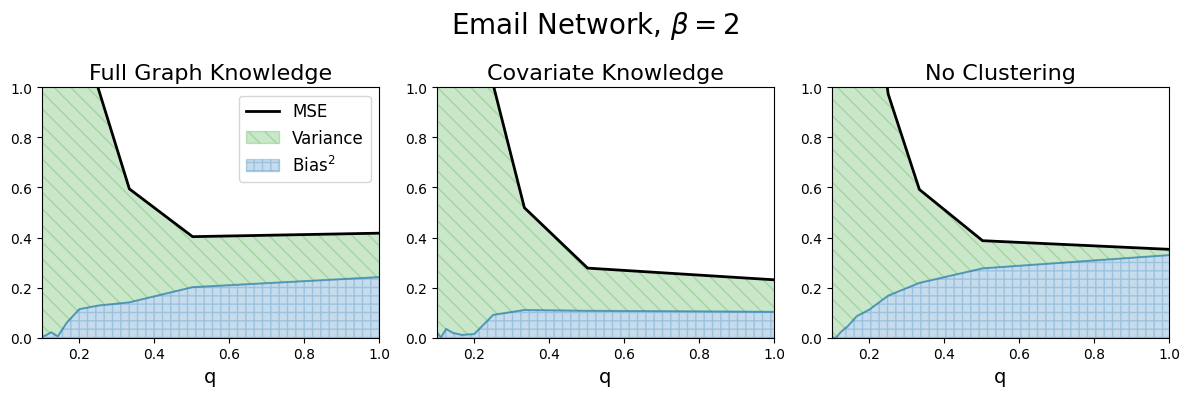

In [18]:
import experiment_python_scripts.compare_clusterings_plot as cluster_plot
import pickle

network_name = "Email"

data_file = open(network_name + "/Experiments/compare_clusterings_b05.pkl", 'rb')
save_name = "compare_clusterings_b05_" + network_name + ".png"
data = pickle.load(data_file)
data_file.close()

beta = 2

cluster_plot.draw_plots(network_name, save_name, data, beta)